In [2]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
playlists_df = pd.read_csv('spotify_playlists.csv', sep=';')
playlists_df = playlists_df.rename(index=str, columns={'trackIds': 'track_ids', 'numTracks': 'num_tracks'})

playlists_df = playlists_df[playlists_df.followers != 'null']
playlists_df['followers'] = [int(i) for i in playlists_df['followers']]

playlists_df['track_ids'] = [i.replace(',null', '').replace('"','').replace('[','').replace(']','').split(',') for i in playlists_df['track_ids']]

playlists_df['num_tracks'] = [int(len(i)) for i in playlists_df['track_ids']]

playlists_df.head()

,id,followers,name,owner,track_ids,num_tracks
0,37i9dQZF1DXcBWIGoYBM5M,18129916,Today's Top Hits,spotify,"[0tBbt8CrmxbjRP0pueQkyU, 2amzBJRBPOGszBem4Fedf...",50
1,37i9dQZF1DX0XUsuxWHRQd,8323892,RapCaviar,spotify,"[4dVpf9jZjcORqGTLUaeYj9, 3ncgNpxLoBQ65ABk4djDy...",51
2,37i9dQZF1DX4dyzvuaRJ0n,4600937,mint,spotify,"[3VQDpxMffTaggOHEeur7Tj, 43V1z6QToNNWNldV4FEG6...",52
3,37i9dQZF1DX4SBhb3fqCJd,3787551,Are & Be,spotify,"[6gU9OKjOE7ghfEd55oRO57, 25wStx3LyTjYmHTd3RDu0...",51
4,37i9dQZF1DXcF6B6QPhFDv,3996091,Rock This,spotify,"[3k7JQg9M5rZJHveFYq0y9J, 5UMD1Iz7yyVK8Q5FLsVt3...",50


In [4]:
len(playlists_df)

1643

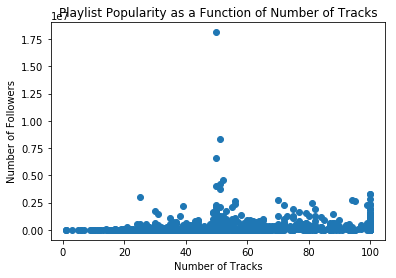

In [4]:
# plt.figure(figsize=(20,10))
plt.scatter(playlists_df['num_tracks'], playlists_df['followers'])
plt.xlabel('Number of Tracks')
plt.ylabel('Number of Followers')
plt.title('Playlist Popularity as a Function of Number of Tracks')

In [6]:
tracks_df = pd.read_csv('small_tracks.csv', sep=';')

tracks_df['artist_names'] = [i.replace('"','').replace('[','').replace(']','').split(',') for i in tracks_df['artist_names']]
tracks_df['artist_ids'] = [i.replace('"','').replace('[','').replace(']','').split(',') for i in tracks_df['artist_ids']]
tracks_df['available_markets'] = [i.replace('"','').replace('[','').replace(']','').split(',') for i in tracks_df['available_markets']]
tracks_df['explicit'] = [int(i) for i in tracks_df['explicit']]

tracks_df.head()

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


,album_name,album_id,artist_names,artist_ids,available_markets,track_id,track_isrc_id,track_name,track_number,disc_number,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,duration_ms,time_signature
0,x (Deluxe Edition),1xn54DMo2qIqBuMqHtUsFd,[Ed Sheeran],[6eUKZXaKkcviH0Ku9w2n3V],"[AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, CO, C...",34gCuhDGsG4bRPIf9bb02f,GBAHS1400099,Thinking Out Loud,11,1,...,2,-6.061,1,0.0295,0.474,0.000000,0.1840,0.591,281560,4
1,Love In The Future,4OTAx9un4e6NfoHuVRiOrC,[John Legend],[5y2Xq6xcjJb2jVM54GHK3t],"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",3U4isOIWM3VvDubwSI3y7a,USSM11303954,All of Me,6,1,...,8,-7.064,1,0.0322,0.922,0.000000,0.1320,0.331,269560,4
2,In The Lonely Hour (Drowning Shadows Edition),0kJbDT8VGMScK8YDzNNvzV,[Sam Smith],[2wY79sveU1sp5g7SokKOiI],"[AD, AR, AT, AU, BE, BG, BO, BR, CH, CL, CO, C...",62NVyyEBiRxGae3SeB97nl,GBUM71308833,Stay With Me,3,1,...,0,-6.275,1,0.0435,0.521,0.000135,0.1060,0.184,172724,4
3,Come Away With Me,1JvoMzqg04nC29gam4Qaiq,[Norah Jones],[2Kx7MNY7cI1ENniW7vT30N],"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",6ybViy2qrO9sIi41EgRJgx,USBN20100529,Don't Know Why,1,1,...,5,-11.775,1,0.0280,0.883,0.000011,0.0659,0.618,186147,4
4,Dock Of The Bay,0kSkzG0sfuG4lRuFF5jWVr,[Otis Redding],[60df5JBRRPcnSpsIMxxwQm],"[AD, AR, AT, AU, BE, BG, BO, BR, CA, CH, CL, C...",4Y4Gd3ty8uut6Qw43c7yJc,USAT29900865,(Sittin' On) The Dock Of The Bay,1,1,...,2,-13.522,1,0.0533,0.726,0.000002,0.0601,0.598,166827,4


In [7]:
print(list(tracks_df))

['album_name', 'album_id', 'artist_names', 'artist_ids', 'available_markets', 'track_id', 'track_isrc_id', 'track_name', 'track_number', 'disc_number', 'explicit', 'popularity', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'duration_ms', 'time_signature']


In [8]:
continuous_var = ['popularity','danceability','energy','loudness','speechiness','acousticness','instrumentalness','liveness','valence','duration_ms']
categorical_var = ['explicit','key','mode','time_signature']

def gen_cols(track_list):
    values = [[] for i in range(len(continuous_var))]
    for track in track_list:
        for j in range(len(continuous_var)):
            values[j].append((tracks_df.loc[tracks_df['track_id'] == track, continuous_var[j]]))
    return values
#     df = tracks_df.loc[tracks_df['track_id'].isin(track_list)]
#     return df


In [9]:
(tracks_df.loc[tracks_df['track_id'] == '34gCuhDGsG4bRPIf9bb02f', 'speechiness'])[0]

0.029499999999999998